In [5]:
import pandas as pd
df = pd.read_excel('UpdatedDataSet.xlsx')
df.shape

(70128, 76)

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

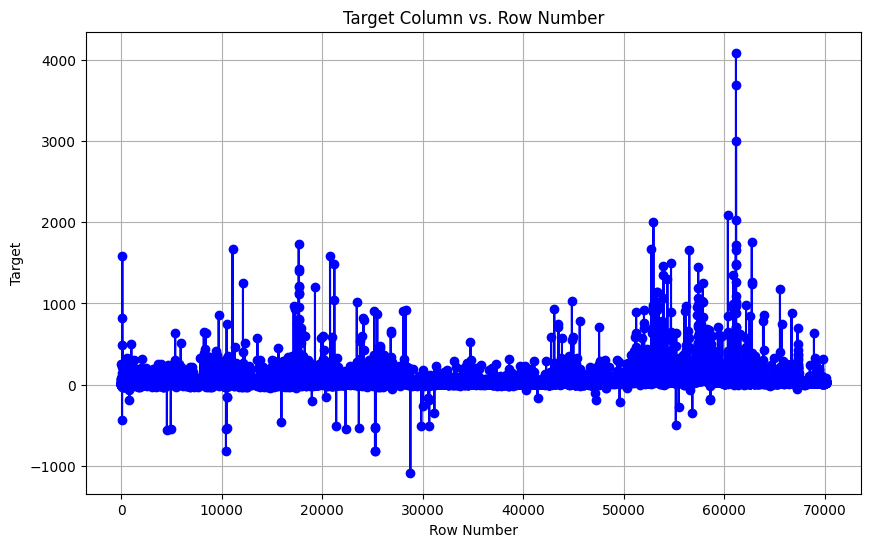

In [8]:

if 'Target' in df.columns:
    # Plot 'Target' against row numbers
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Target'], marker='o', linestyle='-', color='b')
    plt.title('Target Column vs. Row Number')
    plt.xlabel('Row Number')
    plt.ylabel('Target')
    plt.grid(True)
    plt.show()
else:
    print("The 'Target' column does not exist in the DataFrame.")

In [9]:
import numpy as np
import pandas as pd

def pauta_criterion(data, threshold=3):
    """
    Identifies outliers in a dataset using the Pauta criterion (3-sigma rule).

    Parameters:
    - data: A pandas DataFrame or Series containing the dataset.
    - threshold: The number of standard deviations to use as the cutoff for outliers (default is 3).

    Returns:
    - A boolean mask indicating which data points are outliers.
    """
    if isinstance(data, pd.DataFrame):
        outliers = pd.DataFrame(index=data.index, columns=data.columns)
        for column in data.columns:
            mean = data[column].mean()
            std_dev = data[column].std()
            outliers[column] = (np.abs(data[column] - mean) > threshold * std_dev)
    elif isinstance(data, pd.Series):
        mean = data.mean()
        std_dev = data.std()
        outliers = (np.abs(data - mean) > threshold * std_dev)
    else:
        raise TypeError("Input must be a pandas DataFrame or Series.")
    
    return outliers

# Example usage:
# Assuming 'df' is your DataFrame and you want to check for outliers in the 'Feature1' column
outliers_mask = pauta_criterion(df['Target'])
outliers = df[outliers_mask]


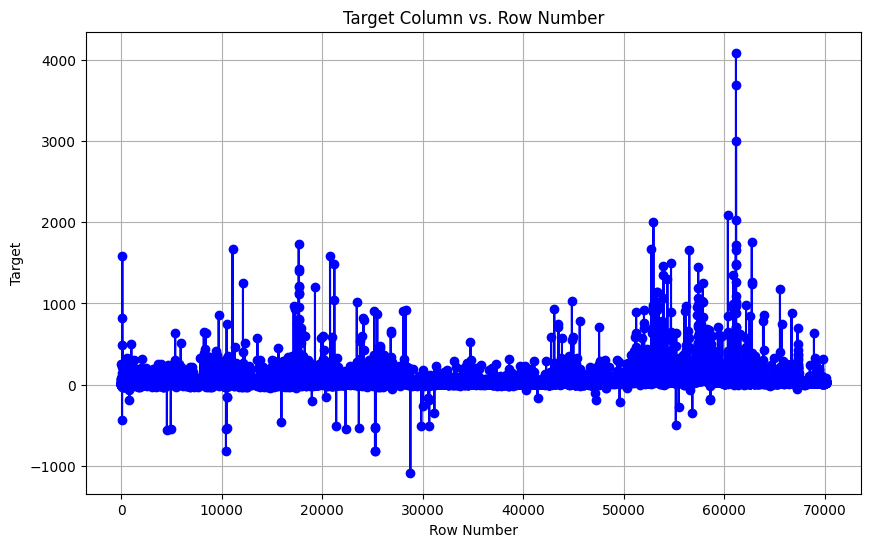

In [10]:
if 'Target' in df.columns:
    # Plot 'Target' against row numbers
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Target'], marker='o', linestyle='-', color='b')
    plt.title('Target Column vs. Row Number')
    plt.xlabel('Row Number')
    plt.ylabel('Target')
    plt.grid(True)
    plt.show()
else:
    print("The 'Target' column does not exist in the DataFrame.")

Feat 1     0
Feat 2     0
Feat 3     0
Feat 4     0
Feat 5     0
          ..
Feat 72    0
Feat 73    0
Feat 74    0
Feat 75    0
Target     0
Length: 76, dtype: int64


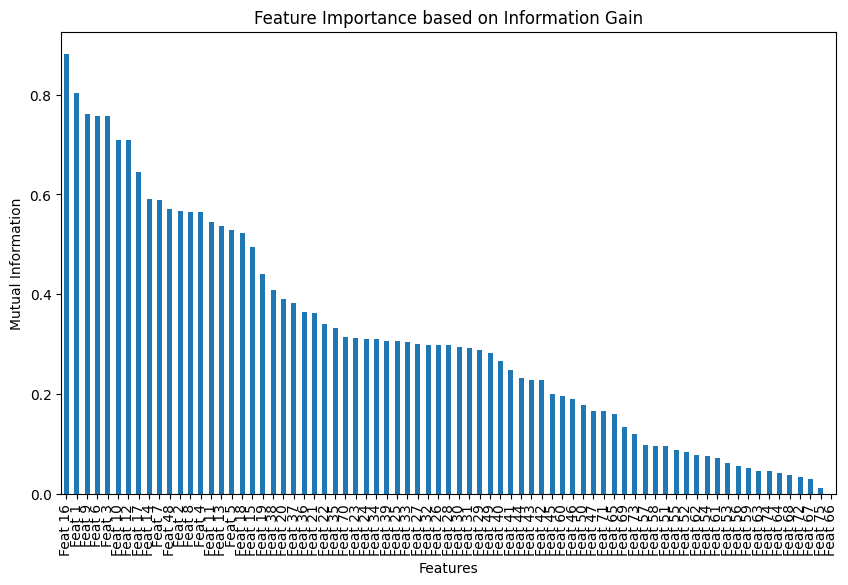

In [11]:
data = df

# Inspect the first few rows of the dataset
data.head()

# Check for missing values
print(data.isnull().sum())

# Handle missing values if any (e.g., by imputing or removing)
# For simplicity, let's drop rows with missing values
data = data.dropna()

# Separate features and target variable
X = data.drop(columns=['Target'])  # Replace 'Target' with your actual target column name
y = data['Target']

# Normalize features using Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Filter Method: Calculate Information Gain (Mutual Information)
mi = mutual_info_regression(X_scaled, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

# Plot the Information Gain of each feature
plt.figure(figsize=(10, 6))
mi_series.plot(kind='bar')
plt.title('Feature Importance based on Information Gain')
plt.ylabel('Mutual Information')
plt.xlabel('Features')
plt.show()

# Select top N features based on Information Gain
N = 20  # You can adjust this number based on your analysis
top_features = mi_series.index[:N]
X_top = X_scaled[top_features]


In [12]:
pip install skfeature-chappers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
from skfeature.function.information_theoretical_based import FCBF


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from skfeature.function.information_theoretical_based import FCBF

# Load your dataset


# Separate features and target
X = df.drop(columns=['Target'])  # Replace 'Target' with your actual target column name
y = df['Target']

# Discretize continuous features into 10 bins using KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(X)

# Apply FCBF
selected_features_indices = FCBF.fcbf(X_discretized, y.values)

# Get the names of the selected features
selected_features = X.columns[selected_features_indices]
print("Selected Features:", selected_features)

# Proceed with model training using the selected features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select the relevant features
X_selected = X[selected_features]

C:\Users\Danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 65 is constant and will be replaced with 0.
  warnings.warn(


Selected Features: Index(['Feat 75', 'Feat 33', 'Feat 31', 'Feat 28', 'Feat 25', 'Feat 9',
       'Feat 8', 'Feat 6', 'Feat 2', 'Feat 1', 'Feat 53', 'Feat 50', 'Feat 52',
       'Feat 34', 'Feat 30', 'Feat 3', 'Feat 29', 'Feat 46', 'Feat 60',
       'Feat 12', 'Feat 44', 'Feat 49', 'Feat 26', 'Feat 57', 'Feat 16',
       'Feat 43', 'Feat 63', 'Feat 4', 'Feat 65', 'Feat 10', 'Feat 61',
       'Feat 5', 'Feat 66', 'Feat 42', 'Feat 67', 'Feat 35', 'Feat 64',
       'Feat 7', 'Feat 23', 'Feat 55', 'Feat 62', 'Feat 38', 'Feat 74',
       'Feat 21', 'Feat 47', 'Feat 17', 'Feat 73', 'Feat 70', 'Feat 69',
       'Feat 37', 'Feat 15', 'Feat 11', 'Feat 32', 'Feat 13', 'Feat 19',
       'Feat 20', 'Feat 56', 'Feat 36', 'Feat 27', 'Feat 40', 'Feat 41',
       'Feat 24', 'Feat 54', 'Feat 39', 'Feat 48', 'Feat 45', 'Feat 68',
       'Feat 71', 'Feat 18', 'Feat 58', 'Feat 72', 'Feat 59', 'Feat 51',
       'Feat 22', 'Feat 14'],
      dtype='object')


In [18]:
top_5_features = X.columns[selected_features_indices[:5]]
print("Top 5 Selected Features:", top_5_features)

Top 5 Selected Features: Index(['Feat 75', 'Feat 33', 'Feat 31', 'Feat 28', 'Feat 25'], dtype='object')


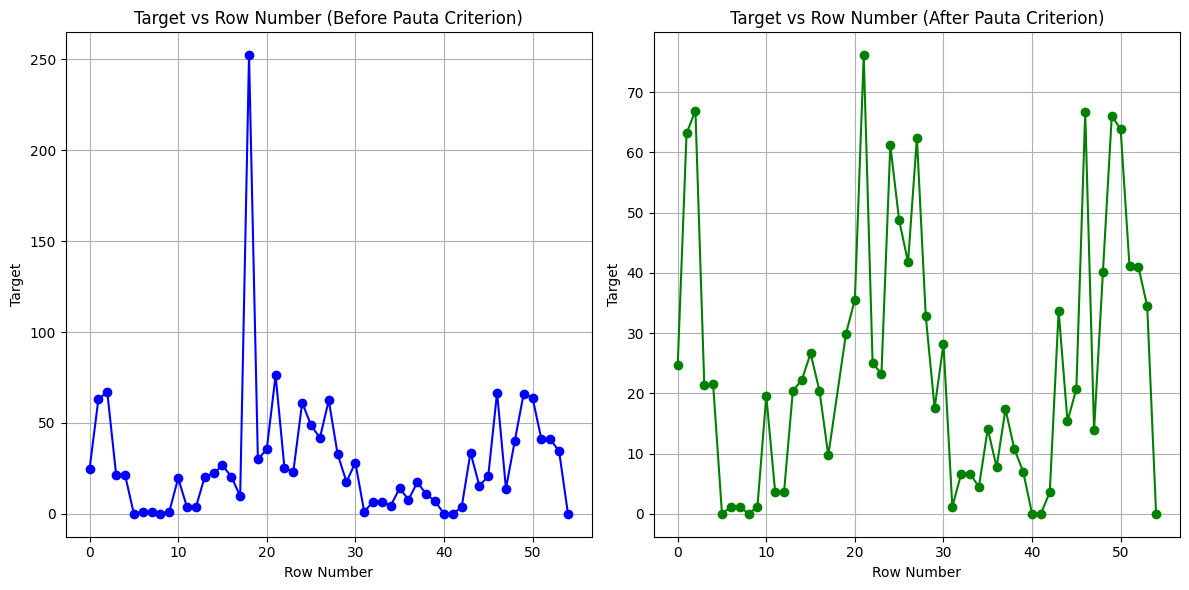

In [48]:
import matplotlib.pyplot as plt

# Apply the Pauta criterion to detect outliers in the 'Target' column
def pauta_criterion(series, threshold=3):
    """
    Identifies outliers in a series using the Pauta criterion (3-sigma rule).
    
    Parameters:
    - series: Pandas Series to analyze for outliers.
    - threshold: The number of standard deviations to use as the cutoff for outliers.
    
    Returns:
    - A boolean mask indicating which data points are outliers.
    """
    mean = series.mean()
    std_dev = series.std()
    outliers = (series - mean).abs() > threshold * std_dev
    return outliers

# Filter the first 2500 records
first_2500 = df['Target'][:55]

# Detect outliers in the 'Target' column for the first 2500 records
outliers_mask = pauta_criterion(first_2500)

# Create a filtered version of the data, excluding outliers
filtered_target = first_2500[~outliers_mask]

# Plot Target vs Row Number before and after applying Pauta criterion
plt.figure(figsize=(12, 6))

# Plot before Pauta criterion
plt.subplot(1, 2, 1)
plt.plot(first_2500.index, first_2500, marker='o', linestyle='-', color='b')
plt.title('Target vs Row Number (Before Pauta Criterion)')
plt.xlabel('Row Number')
plt.ylabel('Target')
plt.grid(True)

# Plot after Pauta criterion
plt.subplot(1, 2, 2)
plt.plot(filtered_target.index, filtered_target, marker='o', linestyle='-', color='g')
plt.title('Target vs Row Number (After Pauta Criterion)')
plt.xlabel('Row Number')
plt.ylabel('Target')
plt.grid(True)

plt.tight_layout()
plt.show()


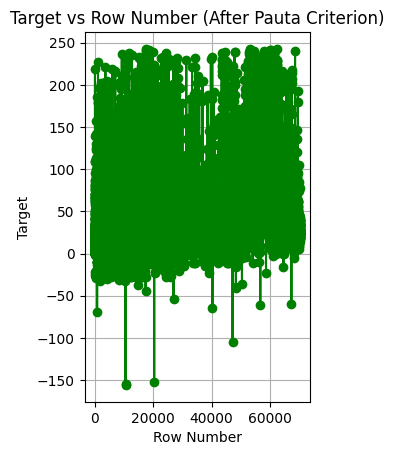

In [29]:
plt.subplot(1, 2, 1)
plt.plot(filtered_target.index, filtered_target, marker='o', linestyle='-', color='g')
plt.title('Target vs Row Number (After Pauta Criterion)')
plt.xlabel('Row Number')
plt.ylabel('Target')
plt.grid(True)

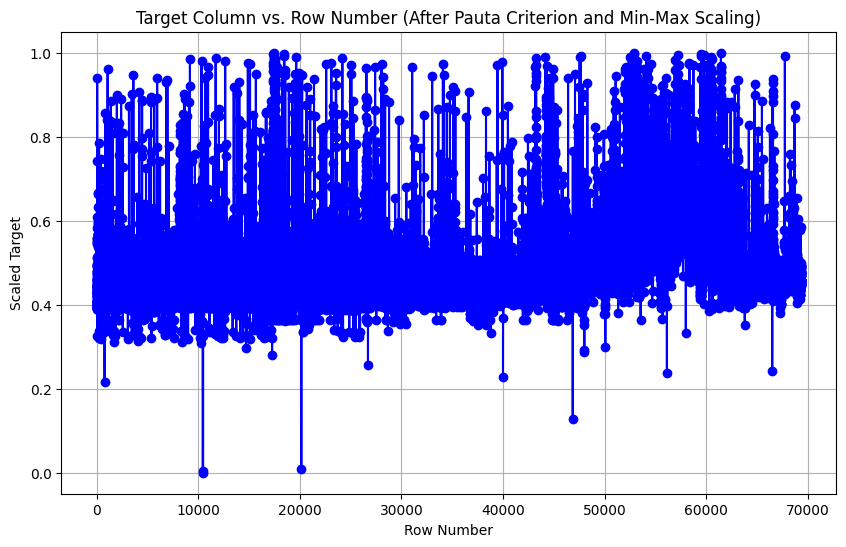

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def pauta_criterion(series, threshold=3):
    """
    Identifies outliers in a series using the Pauta criterion (3-sigma rule).
    
    Parameters:
    - series: Pandas Series to analyze for outliers.
    - threshold: The number of standard deviations to use as the cutoff for outliers.
    
    Returns:
    - A boolean mask indicating which data points are outliers.
    """
    mean = series.mean()
    std_dev = series.std()
    outliers = (series - mean).abs() > threshold * std_dev
    return ~outliers  # Invert mask to keep non-outliers

# Filter data to exclude outliers based on Pauta criterion
non_outliers_mask = pauta_criterion(df['Target'])  # Apply only to 'Target' column
df_filtered = df[non_outliers_mask]

# Apply Min-Max scaling to all columns after removing outliers
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered), columns=df.columns)

# Plot the scaled 'Target' values against row numbers after applying Pauta criterion and scaling
plt.figure(figsize=(10, 6))
plt.plot(df_scaled.index, df_scaled['Target'], marker='o', linestyle='-', color='b')
plt.title('Target Column vs. Row Number (After Pauta Criterion and Min-Max Scaling)')
plt.xlabel('Row Number')
plt.ylabel('Scaled Target')
plt.grid(True)
plt.show()

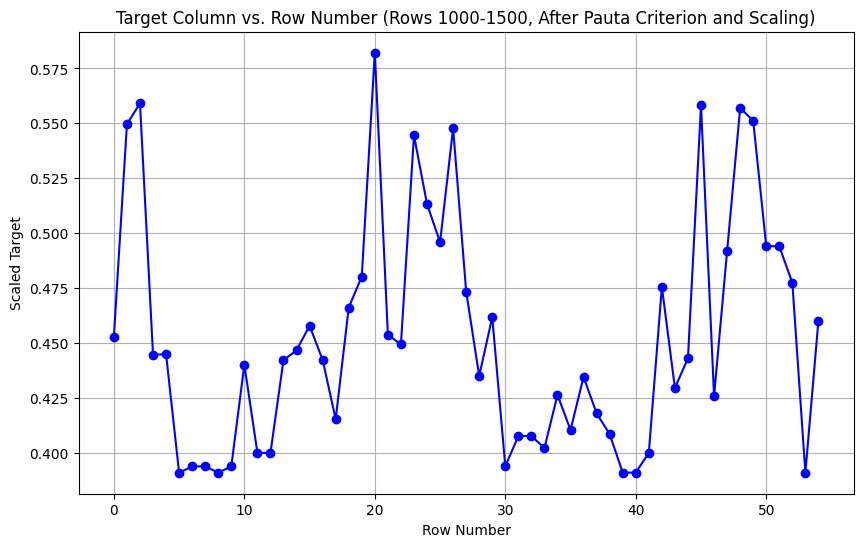

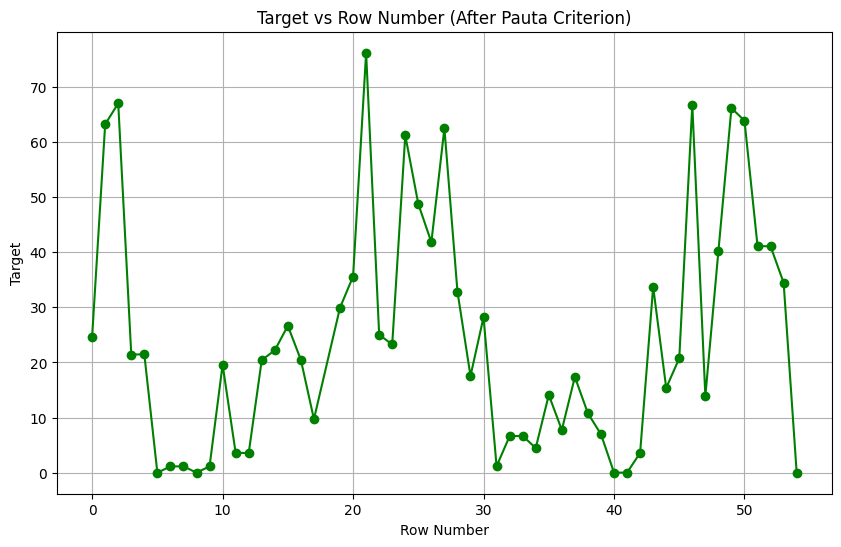

In [49]:
df_subset = df_scaled.iloc[:55]

# Plot the scaled 'Target' values for rows 1000 to 1500
plt.figure(figsize=(10, 6))
plt.plot(df_subset.index, df_subset['Target'], marker='o', linestyle='-', color='b')
plt.title('Target Column vs. Row Number (Rows 1000-1500, After Pauta Criterion and Scaling)')
plt.xlabel('Row Number')
plt.ylabel('Scaled Target')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(filtered_target.index, filtered_target, marker='o', linestyle='-', color='g')
plt.title('Target vs Row Number (After Pauta Criterion)')
plt.xlabel('Row Number')
plt.ylabel('Target')
plt.grid(True)

In [50]:
X = df_scaled.drop(columns=['Target'])
y = df_scaled['Target']

# Step 3: Select top 20 features based on Information Gain (IG)
ig_scores = mutual_info_regression(X, y)
ig_top20_indices = np.argsort(ig_scores)[-20:]  # Get indices of top 20 features
ig_top20_features = X.columns[ig_top20_indices]
print("\nTop 20 Features based on Information Gain (IG):")
print(ig_top20_features)




Top 20 Features based on Information Gain (IG):
Index(['Feat 19', 'Feat 15', 'Feat 18', 'Feat 13', 'Feat 5', 'Feat 11',
       'Feat 8', 'Feat 4', 'Feat 2', 'Feat 48', 'Feat 7', 'Feat 14', 'Feat 17',
       'Feat 12', 'Feat 10', 'Feat 3', 'Feat 6', 'Feat 9', 'Feat 1',
       'Feat 16'],
      dtype='object')


In [51]:
# Step 4: Select top 20 features using Fast Correlation-Based Filter (FCBF)
# Discretize data for FCBF
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(X)

# Apply FCBF to get the selected feature indices
fcbf_indices = FCBF.fcbf(X_discretized, y.values)
fcbf_top20_indices = fcbf_indices[:20]  # Get top 20 features from FCBF
fcbf_top20_features = X.columns[fcbf_top20_indices]
print("\nTop 20 Features based on Fast Correlation-Based Filter (FCBF):")
print(fcbf_top20_features)



C:\Users\Danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 65 is constant and will be replaced with 0.
  warnings.warn(



Top 20 Features based on Fast Correlation-Based Filter (FCBF):
Index(['Feat 75', 'Feat 73', 'Feat 34', 'Feat 29', 'Feat 25', 'Feat 16',
       'Feat 9', 'Feat 8', 'Feat 4', 'Feat 2', 'Feat 1', 'Feat 49', 'Feat 62',
       'Feat 65', 'Feat 53', 'Feat 56', 'Feat 18', 'Feat 31', 'Feat 68',
       'Feat 15'],
      dtype='object')


In [52]:
# Step 5: Union of IG and FCBF features
union_features = set(ig_top20_features).union(set(fcbf_top20_features))
print("\nUnion of Features from IG and FCBF:")
print(union_features)




Union of Features from IG and FCBF:
{'Feat 29', 'Feat 48', 'Feat 12', 'Feat 10', 'Feat 3', 'Feat 25', 'Feat 7', 'Feat 4', 'Feat 49', 'Feat 75', 'Feat 56', 'Feat 14', 'Feat 19', 'Feat 53', 'Feat 73', 'Feat 65', 'Feat 8', 'Feat 68', 'Feat 34', 'Feat 2', 'Feat 18', 'Feat 17', 'Feat 13', 'Feat 31', 'Feat 5', 'Feat 6', 'Feat 11', 'Feat 1', 'Feat 62', 'Feat 15', 'Feat 9', 'Feat 16'}


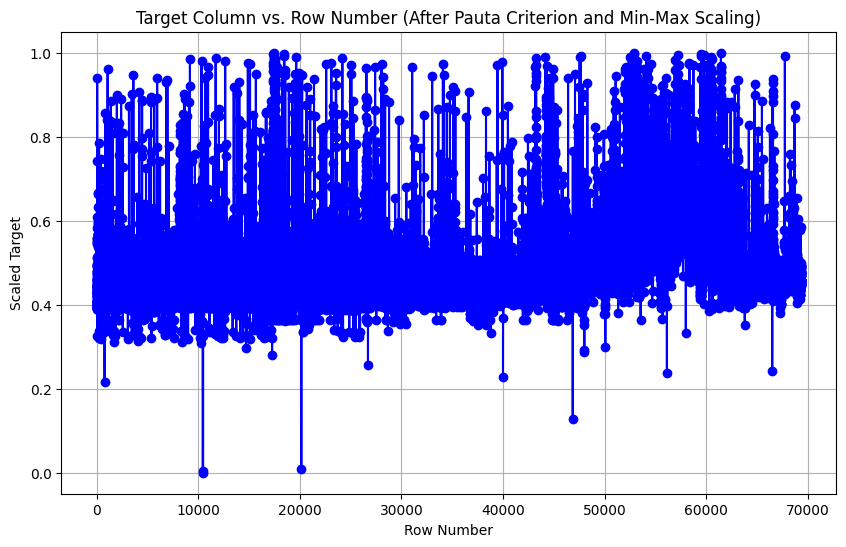

In [53]:
# Step 6: Visualization of Processed Data and Selected Features
plt.figure(figsize=(10, 6))
plt.plot(df_scaled.index, df_scaled['Target'], marker='o', linestyle='-', color='b')
plt.title('Target Column vs. Row Number (After Pauta Criterion and Min-Max Scaling)')
plt.xlabel('Row Number')
plt.ylabel('Scaled Target')
plt.grid(True)
plt.show()

In [58]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Use the union of selected features as input data
X_union = X[list(union_features)]  # Ensure 'union_features' contains the selected features from IG and FCBF

# Initialize the model for RFE
model = RandomForestRegressor(n_estimators=100, random_state=42)




In [59]:
# Use RFE with cross-validation to select the optimal subset of features
best_score = float('-inf')
best_subset = None
best_num_features = 0



In [61]:
# Iterate over a range of feature subset sizes
for n_features in range(1, len(union_features) + 1):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    scores = cross_val_score(rfe, X_union, y, cv=5, scoring='neg_mean_squared_error')  # 5-fold CV with MSE
    print(1)
    # Calculate the mean RMSE
    mean_score = np.sqrt(-scores.mean())
    print(f"Number of features: {n_features}, RMSE: {mean_score}")
    
    # Update best subset if the current score is better
    if mean_score > best_score:
        best_score = mean_score
        best_subset = rfe
        best_num_features = n_features

# Fit the best RFE model on the union of selected features
best_subset.fit(X_union, y)



KeyboardInterrupt: 

In [ ]:
# Get the names of the best features
best_features = X_union.columns[best_subset.support_]
print(f"\nBest number of features: {best_num_features}")
print("Best subset of features selected by Best First Search (RFE):")
print(best_features)

In [ ]:
from sklearn.linear_model import LinearRegression  # Use a simpler model for faster processing
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# Initialize a simpler model for RFE
model = LinearRegression()

# Update the range to start from 5 and limit to 20 features, with 3-fold CV
best_score = float('-inf')
best_subset = None
best_num_features = 0

for n_features in range(5, min(20, len(union_features)) + 1):  # Limit subset sizes
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    scores = cross_val_score(rfe, X_union, y, cv=3, scoring='neg_mean_squared_error')  # 3-fold CV
    
    # Calculate the mean RMSE
    mean_score = np.sqrt(-scores.mean())
    print(f"Number of features: {n_features}, RMSE: {mean_score}")
    
    # Update best subset if the current score is better
    if mean_score > best_score:
        best_score = mean_score
        best_subset = rfe
        best_num_features = n_features

# Fit the best RFE model on the union of selected features
best_subset.fit(X_union, y)

# Get the names of the best features
best_features = X_union.columns[best_subset.support_]
print(f"\nBest number of features: {best_num_features}")
print("Best subset of features selected by Best First Search (RFE):")
print(best_features)


Number of features: 5, RMSE: 0.04822758267981744
Number of features: 6, RMSE: 0.04771839038890507
Number of features: 7, RMSE: 0.04744675932667878
Number of features: 8, RMSE: 0.04730385869677462
Number of features: 9, RMSE: 0.04721210017124168
Number of features: 10, RMSE: 0.04712079355028387
Number of features: 11, RMSE: 0.047096186779064235
